In [42]:
import pandas as pd
import numpy as np


df = pd.read_csv('decision_tree_dataset.txt',  header=None)
df.columns=['A','B','C']


In [45]:
df.head()

,A,B,C
0,-1.137487,-0.405676,0.0
1,0.474643,1.079230,0.0
2,0.132201,-0.966897,1.0
3,0.523287,-0.367837,1.0
4,0.143975,-0.453445,1.0


In [52]:
import numpy as np

def entropy(y):
    """
    Calculate the information entropy H(x) for a vector of labels.

    Parameters:
    - y: numpy array, vector of labels (integers).

    Returns:
    - float, information entropy.
    """
    unique_labels, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def information_gain(y_parent, index_split):
    """
    Calculate the information gain for a given split.

    Parameters:
    - y_parent: numpy array, labels of the parent node.
    - index_split: numpy array, binary vector indicating samples assigned to the left child (1) or right child (0).

    Returns:
    - float, information gain.
    """
    entropy_parent = entropy(y_parent)
    size_left = np.sum(index_split)
    size_right = len(y_parent) - size_left

    entropy_left = entropy(y_parent[index_split])
    entropy_right = entropy(y_parent[~index_split])

    information_gain = entropy_parent - (size_left / len(y_parent)) * entropy_left - (size_right / len(y_parent)) * entropy_right
    return information_gain

def best_split(X, y):
    """
    Find the best split dimension and value w.r.t. information gain.

    Parameters:
    - X: numpy array, data.
    - y: numpy array, labels.

    Returns:
    - tuple (split_dim, split_val), best split dimension and value.
    """
    num_features = X.shape[1]
    best_information_gain = 0
    best_split_dim = None
    best_split_val = None

    for split_dim in range(num_features):
        unique_values = np.unique(X[:, split_dim])
        for split_val in unique_values:
            index_split = X[:, split_dim] <= split_val
            gain = information_gain(y, index_split)

            if gain > best_information_gain:
                best_information_gain = gain
                best_split_dim = split_dim
                best_split_val = split_val

    return best_split_dim, best_split_val

def create_split(X, split_dim, split_val):
    """
    Create a boolean vector indicating assignment to the left child (1) or right child (0).

    Parameters:
    - X: numpy array, data.
    - split_dim: int, split dimension.
    - split_val: float, split value.

    Returns:
    - numpy array, boolean vector indicating assignment to the left child (1) or right child (0).
    """
    return X[:, split_dim] <= split_val

# Example Usage:
# Assuming X is your data and y is the corresponding labels
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y = np.array([0, 0, 1, 1])

split_dim, split_val = best_split(X, y)
split_idx = create_split(X, split_dim, split_val)

print("Best Split Dimension:", split_dim)
print("Best Split Value:", split_val)
print("Split Index:", split_idx)


Best Split Dimension: 0
Best Split Value: 2
Split Index: [ True  True False False]


In [70]:
#df_label=df.iloc[:, 2:3] # exclusive 
df_label = np.array(df.iloc[:,2])
len(df_label)
parent=df.iloc[:,0:2]
parent=np.array(parent)
len(parent)

30

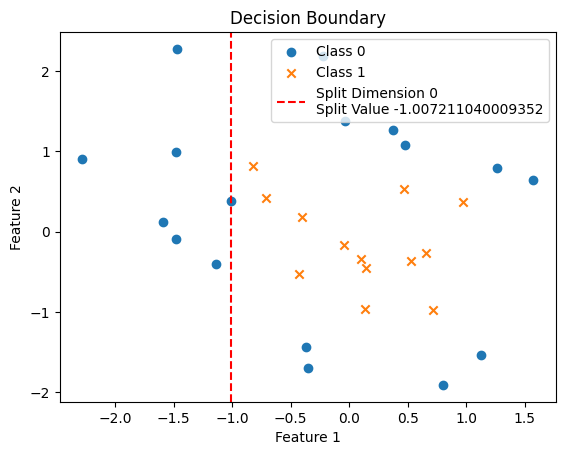

In [71]:
import matplotlib.pyplot as plt

# Function to plot the decision boundary
def plot_decision_boundary(X, y, split_dim, split_val):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0', marker='o')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', marker='x')
    
    plt.axvline(x=split_val, color='red', linestyle='--', label=f'Split Dimension {split_dim}\nSplit Value {split_val}')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.legend()
    plt.show()

# Example Usage:
# Assuming X is your data and y is the corresponding labels
X =parent
y = df_label

split_dim, split_val = best_split(X, y)
split_idx = create_split(X, split_dim, split_val)

# Plot the decision boundary
plot_decision_boundary(X, y, split_dim, split_val)
